# Indian Start-up Investment Analysis (2018 - 2021)

### Aim:
To assess the investment potential and attractiveness of the Indian startup ecosystem and provide recommendations for optimal course of action

### Objectives:
 
1. To assess the overall attractiveness of the Indian startup ecosystem based on funding trends and investor activity from 2018 to 2021.
2. To identify key sectors with high potential for investment based on their funding attractiveness and growth prospects.
3. To evaluate the investment opportunities across different stages of startup development and their risk-return profiles.
4. To analyze the geographical distribution of startups and funding to identify strategic investment locations and regional investment disparities.
5. To determine the correlation between funding amounts received by startups and their subsequent performance, providing insights into potential returns on investment and success rates.

### Business Questions:
1. What are the trends in funding amounts for Indian startups from 2018 to 2021? Are there any significant fluctuations or consistent growth patterns observed over this period?

2. Which sectors within the Indian startup ecosystem attracted the highest total funding during the specified timeframe? Are there any emerging sectors that have shown rapid growth in terms of investment?

3. What is the distribution of investment amounts across different stages of startup development (e.g., seed, early-stage, growth)? Are certain stages more favored by investors, and if so, why?

4. How is the geographical distribution of startups and funding within India? Are there specific regions or cities that have emerged as hubs for startup activity and investment, and are there any notable regional disparities?

5. Is there a correlation between the funding amounts received by startups and their subsequent performance metrics such as revenue growth, user acquisition, or market share? What insights can be gleaned from this correlation in terms of potential returns on investment and success rates?

6. Who are the top investors in the Indian startup ecosystem during the specified period? What sectors do they predominantly invest in, and are there any patterns in their investment strategies?

7. What are the characteristics of successful Indian startups in terms of founding team composition, industry focus, and funding trajectory? Can these characteristics be used to identify potential investment opportunities or predict startup success

### Hypothesis to Test:
 
**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

## Import Packages for Analysis

In [2]:
# import relevant packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')


#### Connect to server for 2020 and 2021 datasets

In [3]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials from .env file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [4]:
# create connection using the pyodbc method 

connection = pyodbc.connect(connection_string)

#### Select tables of interest from the Database

In [5]:
# selecting tables from Database
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

#### View tables of interest from the Database for verification purposes

In [6]:
# call selected table from SQL Database
ata=pd.read_sql(db_query, connection)

ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


# Preview of Datasets

#### Data_2020

In [7]:
# Call DataFrame to understand DataFrame details for 2020
query= "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 =pd.read_sql(query, connection)

data_2020.head()



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Data_2021

In [8]:
# Call DataFrame to understand DataFrame details for 2021.
query= "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 =pd.read_sql(query, connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Data_2019 

#### Load csv data from other sources for analysis

In [9]:
# Read 2019 DataFrame to understand data structure.
data_2019=pd.read_csv("D:\\JHanson\\Justice Hanson\\DS Career Accelerator\Project 1\\Indian-Start-up-Investment-Analysis\\CSV Data\\startup_funding2019.csv")

data_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Data_2018 

In [10]:
# Read 2018 DataFrame to understand data structure.
data_2018=pd.read_csv("D:\\JHanson\\Justice Hanson\\DS Career Accelerator\Project 1\\Indian-Start-up-Investment-Analysis\\CSV Data\\startup_funding2018.csv")

data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Print Column Names for Comparison

In [11]:
# Print column names for comparison
print("Column names in data_2018:")
print(data_2018.columns)
print("\n")

# Column names for data_2019
print("Column names in data_2019:")
print(data_2019.columns)
print("\n")

# Column names for data_2020
print("Column names in data_2020:")
print(data_2020.columns)
print("\n")

# Column names for data_2021
print("Column names in data_2021:")
print(data_2021.columns)
print("\n")

Column names in data_2018:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


Column names in data_2019:
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


Column names in data_2020:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')


Column names in data_2021:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')




Observations
1. **Inconsistency in Column Names**
2018 dataset has different column names compared to the rest of the datasets.

2. **Variations in Column Names**
The same type of information is represented by different column names across years (e.g., 'Company Name', 'Company/Brand', 'Company_Brand').

3. **Unique Columns**
Some years have unique columns not present in other years, which may complicate direct merging.

*This will be addressed by Standardizing column names across all datasets, align similar columns to a standard name for consistency and unique columns based on their importance and relevance will be handled while irrelevant columns will be dropped.*


#### Column renaming for consistency and merging

In [12]:
# Rename columns in each dataset
data_2018.rename(columns={
    'Company Name': 'company_name',
    'Industry': 'sector',
    'Round/Series': 'stage',
    'Amount': 'funding_amount',
    'Location': 'location',
    'About Company': 'description'
}, inplace=True)

# 2019 column mapping
data_2019.rename(columns={
    'Company/Brand': 'company_name',
    'HeadQuarter': 'location',
    'Sector': 'sector',
    'What it does': 'description',
    'Amount($)': 'funding_amount'
}, inplace=True)

# 2020 column mapping
data_2020.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'funding_amount'
}, inplace=True)

# 2021 column mapping
data_2021.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'funding_amount'
}, inplace=True)

# Merge datasets using the standardized column names
merged_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

merged_data.head(5)


,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Stage,HeadQuarter,Sector,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

# Create a list of years corresponding to each dataset
years = [2018, 2019, 2020, 2021]

# Create a new column 'Year' and assign the respective year to each dataset
merged_data['Year'] = pd.concat([data.assign(Year=year) for data, year in zip([data_2018, data_2019, data_2020, data_2021], years)], ignore_index=True)['Year']

# Now the merged_data DataFrame will have a new column 'Year' with respective years assigned to each dataset


In [14]:
# Merge 'location' and 'HeadQuarter' columns into a single 'location' column
merged_data['location'] = merged_data['location'].combine_first(merged_data['HeadQuarter'])

# Merge 'industry' and 'Sector' columns into a single 'industry' column
merged_data['sector'] = merged_data['sector'].combine_first(merged_data['Sector'])

# Merge 'Stage' and 'stage' columns into a single 'stage' column
merged_data['stage'] = merged_data['Stage'].combine_first(merged_data['stage'])

# Drop the original columns
merged_data.drop(columns=['HeadQuarter', 'Sector', 'Stage'], inplace=True)



In [15]:
# Print merge_data for verification
merged_data.head(5)

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,column10,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,2018


In [16]:
# View from the bottom
merged_data.tail(5)

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,column10,Year
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN,2021
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,NaN,2021
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN,2021
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN,2021
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",NaN,2021


In [17]:
# Check data structure and information
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    2879 non-null   object 
 1   sector          2861 non-null   object 
 2   stage           1941 non-null   object 
 3   funding_amount  2622 non-null   object 
 4   location        2765 non-null   object 
 5   description     2879 non-null   object 
 6   Founded         2110 non-null   float64
 7   Founders        2334 non-null   object 
 8   Investor        2253 non-null   object 
 9   column10        2 non-null      object 
 10  Year            2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


Observation
Column 10 is virtually empty, indicating irrelevant column for analysis, while the dataset exhibits incorrect data types, requiring rectification for accurate insights.

In [18]:
# Drop Column 10 permanently
merged_data.drop(columns=['column10'], inplace=True)


In [19]:
# Confirm dropped column
merged_data.head()

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,2018


# 2. Quality Checks on Columns

   #### 2.1 sector column

In [20]:
# Get all unique values in the 'sector' column along with their indexes
unique_sectors = merged_data['sector'].unique()

print("Unique values in 'sector' column with their indexes:")
for idx, sector in enumerate(unique_sectors):
    print(f"{idx}: {sector}")


Unique values in 'sector' column with their indexes:
0: Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing
1: Agriculture, Farming
2: Credit, Financial Services, Lending, Marketplace
3: Financial Services, FinTech
4: E-Commerce Platforms, Retail, SaaS
5: Cloud Infrastructure, PaaS, SaaS
6: Internet, Leisure, Marketplace
7: Market Research
8: Information Services, Information Technology
9: Mobile Payments
10: B2B, Shoes
11: Internet
12: Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat
13: Food Delivery
14: Industrial Automation
15: Automotive, Search Engine, Service Industry
16: Finance, Internet, Travel
17: Accounting, Business Information Systems, Business Travel, Finance, SaaS
18: Artificial Intelligence, Product Search, SaaS, Service Industry, Software
19: Internet of Things, Waste Management
20: Air Transportation, Freight Service, Logistics, Marine Transportation
21: Financial Services
22: Food and Beverage
23

In [21]:
# Mapping dictionary for sector cleaning
sector_mapping = {
    'FinTech': ['FinTech', 'fintech', 'Financial Technology', 'Fintech'],
    'EdTech': ['EdTech', 'Edtech', 'Education Technology'],
    'E-commerce': ['E-commerce', 'Ecommerce', 'ecommerce', 'e-commerce'],
    'AI': ['AI', 'Artificial Intelligence', 'artificial intelligence'],
    'Health': ['Health', 'healthcare', 'Health Care', 'healthtech', 'Healthcare'],
    'Food & Beverage': ['Food & Beverage', 'Foodtech', 'Food and Beverages', 'Food Industry', 'Food devlivery', 'Food & tech', 'Foodtech & Logistics', 'Food & Nutrition', 'Food & Bevarages'],
    'Automotive': ['Automotive', 'Automobile', 'Automobiles', 'Automobile Technology', 'automotive tech'],
    'Logistics': ['Logistics', 'logistics', 'Transport & Rentals', 'Transport', 'Logitech', 'Transportation', 'logistics & Supply Chain'],
    'Fashion': ['Fashion', 'Fashion startup', 'Fashion Tech', 'Fashion and lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'FMCG', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'fashion and lifestyle', 'fashion & lifestyle', 'Fashion & Lifestyle'],
    'CleanTech': ['CleanTech', 'Cleantech', 'Renewables & Environment', 'Clean Energy', 'Pollution control equiptment', 'Renewable player', 'Clean energy', 'Renewable Energy'],
    'Real Estate': ['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing', 'Housing Marketplace', 'Housing & Rentals', 'housing & Rentals'],
    'Tech': ['Tech', 'technology', 'Technology', 'Techonology', 'Tech company', 'tech startup', 'IT', 'IT company'],
    'SaaS': ['SaaS', 'Saas', 'SaaS startup', 'SaaS platform'],
    'Retail': ['Retail', 'Retail Tech', 'Retail startup', 'Retail Aggregator'],
    'Marketing': ['Marketing', 'marketing', 'Marketing company', 'Marketing & Customer loyalty', 'MarTech'],
    'Blockchain': ['Blockchain', 'Cryptocurrency', 'blockchain'],
    'Social Media': ['Social Media', 'Social network', 'social media', 'Social e-commerce', 'Social Network'],
    'Entertainment': ['Entertainment', 'Digital Entertainment', 'media', 'Media', 'Online Media', 'Media Tech'],
    'Travel': ['Travel', 'TravelTech', 'Tourism', 'Tourism & EV', 'Travel tech'],
    'Finance': ['Finance', 'Financial Services', 'Finance company', 'Financial Technology', 'financial services', 'Financial Exchanges', 'financial technology', 'Venture capitalist', 'Venture capital', 'Venture Capital', 'Capital Markets', 'Investment Management', 'Investment', 'investment', 'Investment Banking', 'investment Management', 'Investment', 'Impact Investing', 'impact investing', 'FinTech & Financial Services', 'FinTech'],
    'E-learning': ['E-learning', 'E-Learning', 'EdtTech', 'EdTech', 'EdTech Startup', 'Education', 'education', 'Higher Education', 'continuing education', 'Education Management', 'Education Technology', 'Educational'],
    'AI & Tech': ['AI & Tech', 'AI and tech'],
    'Security': ['Security', 'Cybersecurity', 'Network Security'],
    'Insurance': ['Insurance', 'Insurance technology', 'insurtech', 'Insurance Tech', 'Health Insurance', 'Life Insurance', 'Property Insurance', 'insurance tech'],
    'HR': ['HR', 'HR Tech', 'HRTech', 'Human Resources', 'hrtech'],
    'Beauty': ['Beauty', 'beauty', 'Beauty & wellness', 'Beauty & Personal Care', 'Beauty & Personal Care'],
    'Agriculture': ['Agriculture', 'AgriTech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agriculture Tech', 'AgriTech', 'AgTech', 'Agri tech'],
    'Energy': ['Energy', 'Solar', 'Clean Energy', 'Energy Storage', 'Solar solution', 'Renewable Energy', 'Energy Management', 'Energy', 'Natural Resources', 'electricity', 'Solar Monitoring Company', 'solar', 'Renewable Energy', 'solar'],
    'Mobility': ['Mobility', 'MoEVing', 'Mobility tech', 'Mobility/Transport', 'Mobility & Transport', 'Mobility & Technology', 'Mobility Services', 'Mobility', 'Mobility & EV', 'Mobility & EV', 'Mobility & EV', 'Mobility', 'Mobility', 'Mobility & Tech', 'Mobility'],
    'Manufacturing': ['Manufacturing', 'Manufacturing startup', 'Manufacturing startup', 'manufacturing', 'Manufacturing startup'],
    'D2C': ['D2C', 'D2C Business', 'D2C Fashion', 'D2C jewellery'],
    'Data Science': ['Data Science', 'Data Analytics', 'data science', 'data analytics'],
    'Telecommunications': ['Telecommunications', 'Telecommunication'],
    'Pharmaceutical': ['Pharmaceutical', 'pharmaceutical']
}

# Function to map sector values
def map_sector(sector):
    for key, values in sector_mapping.items():
        if sector in values:
            return key
    return sector  # Return original value if not found

# Apply mapping function to 'sector' column
merged_data['sector'] = merged_data['sector'].apply(map_sector)


#### stage

In [22]:
# Print the unique values in the 'stage' column
unique_stages = merged_data['stage'].unique()
print(unique_stages)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' 'Pre-seed' 'Pre-series' 'Debt' 'Pre-series C'
 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge' 'Pre-Series B'
 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'Series

In [23]:
# Define the mapping dictionary
stage_mapping = {
    'Pre-Series A': ['Pre-Series A', 'Pre Series A', 'Pre series A1', 'Series A2'],
    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],
    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2' ],
    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],
    'Series F': ['Series F', 'Series F2', 'Series F1'],
    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round'],
    'Series E': ['Series E', 'Series E2'],
    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],
    'Series C' : ['Series C, D'],
    'Series D': ['Series D1']
}

# Invert the mapping dictionary to map individual variations to their standard stage names
inverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}

# Apply the mapping to the 'stage' column permanently
merged_data['stage'] = merged_data['stage'].replace(inverted_mapping)

# Display the updated DataFrame to verify the changes
print(merged_data['stage'].unique())



['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed fund' 'Series F' 'Seed round' 'Pre-series A'
 'Pre-seed' 'Pre-series' 'Debt' 'Pre-series C' 'Pre-series B' 'Bridge'
 'Pre- series A' 'Edge' 'Pre-Series B' 'Seed A' 'Pre-Series A'
 'Pre seed Round' 'Angel Round' 'Seed Round' 'Bridge Round'
 'Pre seed round' 'Pre series B' 'Pre series C' 'Mid series' '$1200000'
 'PE' '$300000' 'Early seed' '$6000000' '$1000000' 'Seies A' 'Series I']


In [24]:


# Replace specified values with np.nan in the 'stage' column
values_to_replace = [
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
    '$1200000',
    'PE',
    'Bridge'
]

# Apply the replacement permanently
merged_data['stage'].replace(values_to_replace, np.nan, inplace=True)



#### Amount Column

In [25]:
# Additional characteristics to count
characteristics = ['—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹']

# Initialize counts dictionary
counts = {char: 0 for char in characteristics}

# Count occurrences of each characteristic
for characteristic in characteristics:
    if characteristic in {'—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹'}:
        count = merged_data['funding_amount'].astype(str).str.contains(characteristic, regex=True, na=False).sum()
    else:
        count = merged_data['funding_amount'].astype(str).str.contains(f"\\b{characteristic}\\b", regex=True, na=False).sum()
    counts[characteristic] = count

# Count occurrences of numeric values
numeric_count = merged_data['funding_amount'].notnull().sum()

# Print counts
for characteristic, count in counts.items():
    print(f'{characteristic} - {count}')
print(f'Numeric values - {numeric_count}')




— - 148
\$ - 1289
\$Undisclosed - 73
Undisclosed - 128
None - 3
nan - 254
Series C - 2
Seed - 2
Pre-series A - 1
₹ - 144
Numeric values - 2622


In [26]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Filter the DataFrame for rows containing the specified stages in funding_amount
filtered_data = merged_data[merged_data['funding_amount'].isin(stages_to_search)]

# Print column names
print("Index, Funding Amount, Stage")

# Print index, funding_amount, and corresponding stage side by side
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["funding_amount"]}, {row["stage"]}')


Index, Funding Amount, Stage
1912, Series C, nan
1926, Series C, nan
1927, Seed, nan
2215, Pre-series A, nan
2818, Seed, nan


In [27]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Replace values in 'stage' column where 'funding_amount' matches the specified stages
merged_data.loc[merged_data['funding_amount'].isin(stages_to_search), 'stage'] = merged_data['funding_amount']

# Replace values in 'funding_amount' column with NaN where it matches the specified stages
merged_data.loc[merged_data['funding_amount'].isin(stages_to_search), 'funding_amount'] = float('nan')


In [28]:
# Specify the indexes to verify
indexes_to_verify = [1912, 1926, 1927, 2215]

# Filter the DataFrame for the specified indexes
filtered_data = merged_data.loc[indexes_to_verify]

# Print index, funding_amount, and stage side by side for verification
print("Index, Funding Amount, Stage")
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["funding_amount"]}, {row["stage"]}')


Index, Funding Amount, Stage
1912, nan, Series C
1926, nan, Series C
1927, nan, Seed
2215, nan, Pre-series A


#### Amount Column

Exchage Rate
[Source:OFX](httpshttps://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/://)

In [29]:

# Provided exchange rates between 2018 - 2021
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

# Calculate the average exchange rate
average_exchange_rate = sum(exchange_rates.values()) / len(exchange_rates)

# Print the average exchange rate
print(f'Average exchange rate: {average_exchange_rate:.4f}')



Average exchange rate: 0.0140


In [30]:

# Define the exchange rate
exchange_rate = 0.0140

# Replace '—' in funding_amount with np.nan
merged_data['funding_amount'].replace('—', np.nan, inplace=True)

# Replace 'None' with np.nan
merged_data['funding_amount'].replace('None', np.nan, inplace=True)

# Convert funding_amount to string type
merged_data['funding_amount'] = merged_data['funding_amount'].astype(str)

# Remove dollar symbol and commas, then convert to float
merged_data['funding_amount'] = merged_data['funding_amount'].str.replace('$', '', regex=False)
merged_data['funding_amount'] = merged_data['funding_amount'].str.replace(',', '', regex=False)

# Convert Rupee values to USD and remove the rupee symbol
merged_data['funding_amount'] = merged_data['funding_amount'].apply(
    lambda x: float(x.replace('₹', '')) * exchange_rate if isinstance(x, str) and '₹' in x else x
)

# Convert funding_amount to float type
merged_data['funding_amount'] = pd.to_numeric(merged_data['funding_amount'], errors='coerce')



#### Location

In [31]:

# Replace missing values with an empty string as a placeholder
merged_data['location'] = merged_data['location'].fillna('')

# Replace empty strings with the mode (most frequent city)
mode_city = merged_data['location'].mode()[0]
merged_data['location'] = merged_data['location'].replace('', mode_city)

# Extract city names from 'location' column
merged_data['location'] = merged_data['location'].apply(lambda x: x.split(',')[0].strip())


In [32]:
# Renaming some values in the location column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'Gurugram\t#REF!' : 'Gurugram',
    'New dheli': 'New Delhi'
}
# Replace the names in the 'location' column
merged_data['location'] = merged_data['location'].replace(name_changes)

In [33]:
unique_locations = merged_data['location'].unique()
print(unique_locations)

['Bangalore' 'Mumbai' 'Gurgaon' 'Noida' 'Hyderabad' 'Kalkaji' 'Delhi'
 'India' 'Hubli' 'New Delhi' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Belgaum' 'Thane' 'Margão' 'Indore' 'Alwar' 'Kannur'
 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh' 'Andheri'
 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam' 'Bhopal'
 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow'
 'Telangana' 'Gurugram' 'Surat' 'Uttar pradesh' 'Rajasthan' 'Tirunelveli'
 'Singapore' 'Gujarat' 'Kerala' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'San Francisco Bay Area' 'Bangaldesh' 'London' 'Milano' 'Palmwoods'
 'France' 'Samastipur' 'Irvine' 'Tumkur' 'Newcastle Upon Tyne' 'Shanghai'
 'Jiaxing' 'Rajastan' 'Ludhiana' 'Dehradun' 'San Franciscao' 'Tangerang'
 'Berlin' 'Seattle' 'Riyadh' 'Seoul' 'Bangkok' 'Warangal' 'Hyderebad'
 'Odisha' 'Biha

#### Investor column

In [34]:
# Print unique values in the 'Investor' column
unique_investors = merged_data['Investor'].unique()

# Print each unique investor
for investor in unique_investors:
    print(investor)

nan
Sixth Sense Ventures
General Atlantic
Deepak Parekh, Amitabh Bachchan, Piyush Pandey
Evolvence India Fund (EIF), Pidilite Group, FJ Labs
Innovation in Food and Agriculture (IFA)
Undisclosed
Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,  91springboard via Atal Innovation Mission, Niti Aayog.
Gilda VC, Art Venture, Rajeev Chitrabhanu.
Multiples Alternate Asset Management
SoftBank
Venture Catalysts
Avataar Ventures
Oikocredit
Titan Capital
Matrix Partners
German development finance institution DEG
South Africa’s Naspers Ventures, the CPP Investment Board
Goldman Sachs.
Mumbai Angels Network
Kunal Bahl, Rohit Bansal.
Brazilian VC Fund Confrapar
Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.
Reach Capital
Inflection Point Ventures
Wilson Global Opportunities Fund
Sequoia Capita
IVM Intersurer
Canaan Partners
Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.
Omnivore and Omidyar Network India, Sequoia Capital
Vertex Growth Fund
Rajan Kaistha
Din

In [35]:
# Define the values to drop
values_to_drop = [
    '1000000', '#REF!', '$Undisclosed', '2000000', '$1000000', '$22000000', '$5000000', 'http://100x.vc/'
]

# Replace specified values with NaN in the 'Investor' column
merged_data['Investor'] = merged_data['Investor'].replace(values_to_drop, pd.NA)

In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    2879 non-null   object 
 1   sector          2861 non-null   object 
 2   stage           1934 non-null   object 
 3   funding_amount  2312 non-null   float64
 4   location        2879 non-null   object 
 5   description     2879 non-null   object 
 6   Founded         2110 non-null   float64
 7   Founders        2334 non-null   object 
 8   Investor        2246 non-null   object 
 9   Year            2879 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 225.1+ KB


In [37]:
# Convert 'funding_amount' dtype to float
merged_data['funding_amount'] = merged_data['funding_amount'].astype(float)


In [38]:
# Check for duplicates in merged_data
duplicate_rows = merged_data.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 23


In [39]:
# Drop duplicate rows from merged_data
merged_data.drop_duplicates(inplace=True)

# Verify if duplicates are dropped
print("Number of duplicate rows after dropping:", merged_data.duplicated().sum())


Number of duplicate rows after dropping: 0


In [40]:
merged_data.isna().sum()

company_name        0
sector             18
stage             936
funding_amount    563
location            0
description         0
Founded           768
Founders          544
Investor          630
Year                0
dtype: int64

In [41]:
# Drop the "Founded" and "Founders" columns from merged_data
merged_data.drop(columns=['Founded', 'Founders'], inplace=True)



In [42]:
# Impute missing values in 'sector' with mode
merged_data['sector'].fillna(merged_data['sector'].mode()[0], inplace=True)

# Impute missing values in 'stage' with forward fill
merged_data['stage'].fillna(method='ffill', inplace=True)

# Impute missing values in 'funding_amount' with median
merged_data['funding_amount'].fillna(merged_data['funding_amount'].median(), inplace=True)

# Impute missing values in 'Investor' with mode
merged_data['Investor'].fillna(merged_data['Investor'].mode()[0], inplace=True)


In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    2856 non-null   object 
 1   sector          2856 non-null   object 
 2   stage           2856 non-null   object 
 3   funding_amount  2856 non-null   float64
 4   location        2856 non-null   object 
 5   description     2856 non-null   object 
 6   Investor        2856 non-null   object 
 7   Year            2856 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 200.8+ KB


### EDA

In [44]:
# count the number of startup in each Funding Year
merged_data['Year'].value_counts()


Year
2021    1190
2020    1052
2018     525
2019      89
Name: count, dtype: int64

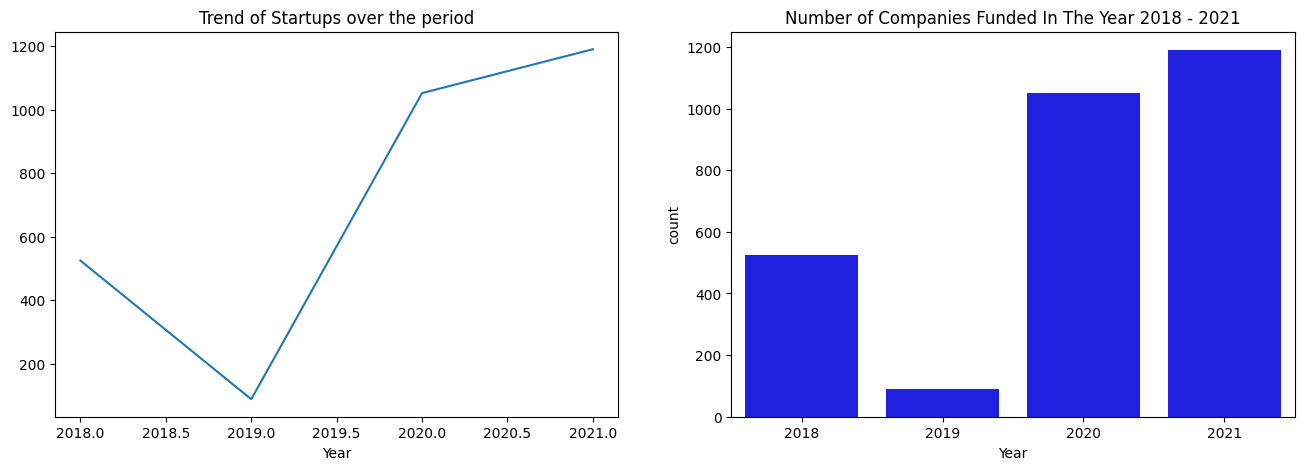

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'blue'
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['Year'])['company_name'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='Year',  
    data=merged_data, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

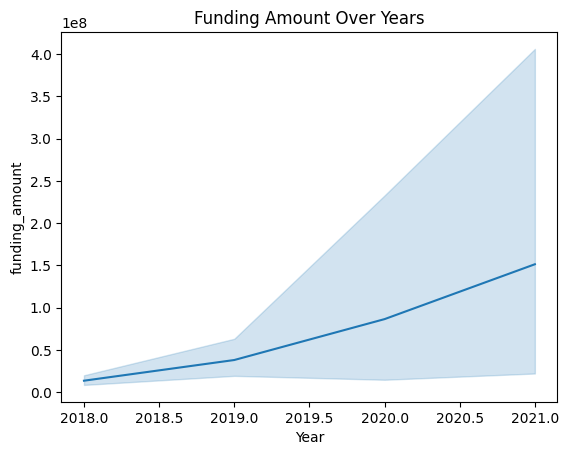

In [46]:
sns.lineplot(data=merged_data, x='Year', y='funding_amount')
plt.title('Funding Amount Over Years')
plt.show()

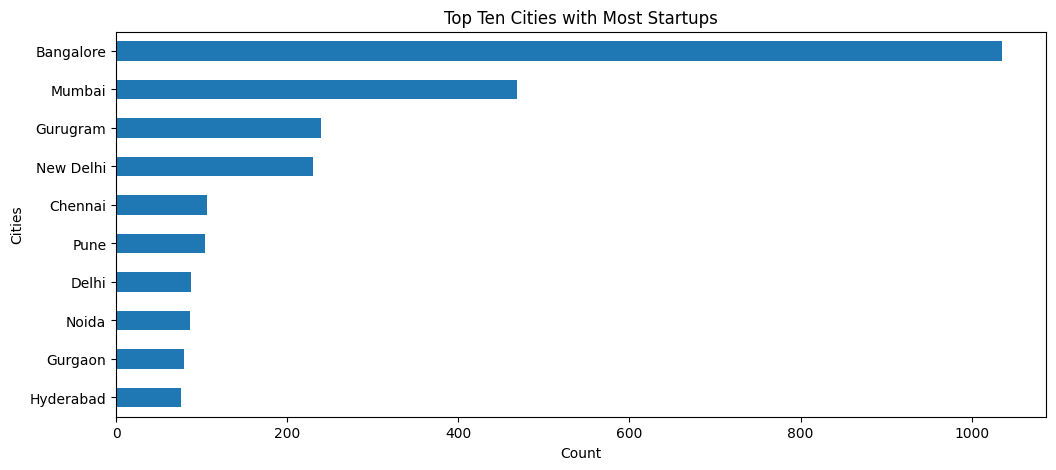

In [68]:
# count the number of startups in each city
top_ten_loc = merged_data['location'].value_counts().head(10).sort_values()

# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_loc.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

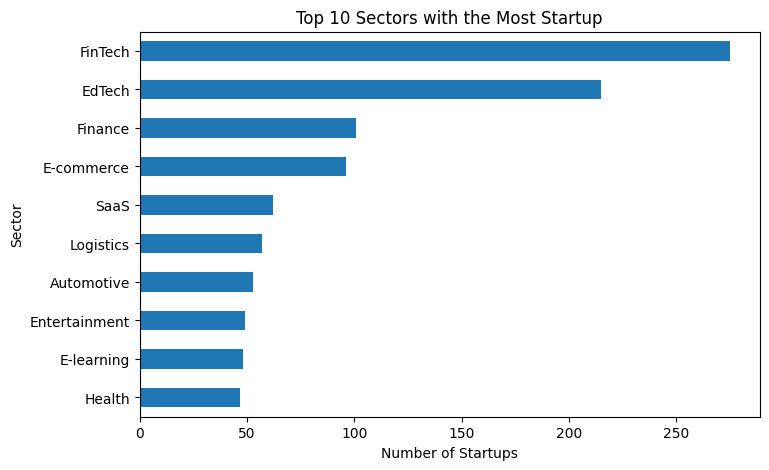

In [69]:
# check the top 10 cities with the most startups
Top_ten_sectors = merged_data['sector'].value_counts().head(10)

# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

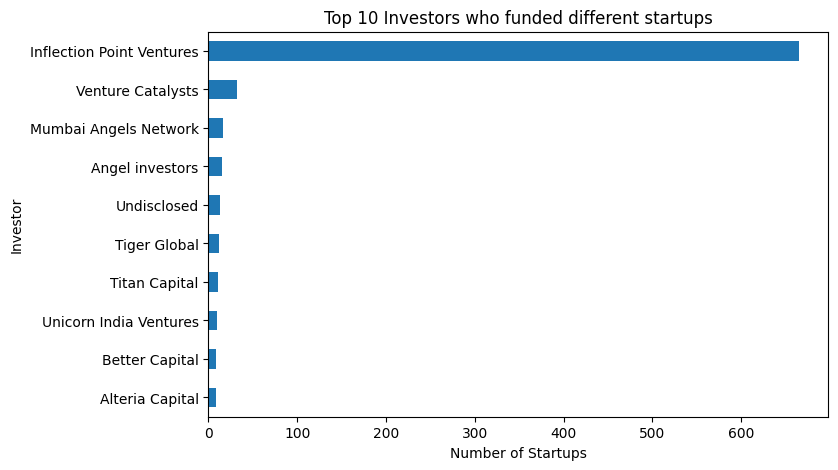

In [71]:
Top_10_investors_ = merged_data['Investor'].value_counts().head(10)

# plot a bar chart to show the top 10 investors with the most number of startups
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh')
plt.title('Top 10 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

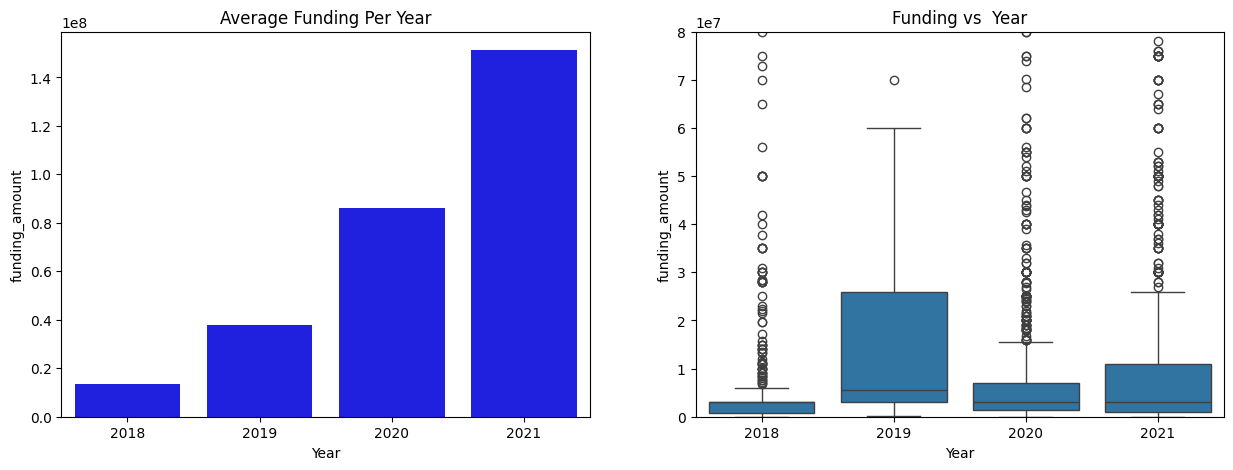

In [72]:
# get the average(mean) funding yearly
average_funding_year= merged_data.groupby(['Year']).agg({'funding_amount': 'mean'})
average_funding_year.reset_index(inplace=True)

# print the average funding yearly
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Year',
    y='funding_amount',
    color=base_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, y='funding_amount', x='Year')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);


### Hypothesis Testing 

**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

In [63]:
import scipy.stats as stats

# Extract funding amounts for each sector
sector_funding = [merged_data[merged_data['sector'] == sector]['funding_amount'] for sector in merged_data['sector'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sector_funding)

alpha = 0.05

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in average funding amounts across sectors.")
else:
    print("Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.")


F-Statistic: 0.022657045083870654
P-Value: 0.9999999999999999
Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.
